# Matchup Result Analysis
this is plotting the results of the matchups as scatter plots

In [1]:
#numeric python module, useful for handling large data arrays
import numpy as np

import pandas as pd

#module for dealing with netCDF files (all sat files are netCDF)
import netCDF4 as nc

#modules for making plots. Here wer are importing the full matplotlib
#module, but also the sub-module pyplot separately with an abbreviated
#name so it is easier to use in the code
import matplotlib.pyplot as plt
import matplotlib

#panda
import pandas as pd


#import datetime
import datetime
from datetime import datetime

#for displaying the plots in this notebook 
%matplotlib inline

#module for making maps
from mpl_toolkits.basemap import Basemap

#miscellaneous operating system interfaces module for doing things like
#moving file, exploring directory paths, etc..
import os
import re


In [3]:
path = '/Users/clarabirdferrer/Documents/Bigelow/Data/'
df = pd.read_csv(path+'clara-matchup_results.csv',sep=",",header = (0))

#this makes a new data frame that holds just the data we want for the analysis
df_m = pd.DataFrame()          
df_m['station']=df['station']
df_m['field']=df['fieldValue']
df_m['giop']=df['giop']
df_m['qaa'] = df['qaa']
df_m['gsm'] = df['gsm']
df_m['lat'] = df['satLat']
df_m['lon'] = df['satlon']

#this makes all the values <0 into NaNs
f = df_m['field']     
f[f < 0] = np.nan
gi = df_m['giop']
gi[gi < 0] = np.nan
qa = df_m['qaa']
qa[qa<0] = np.nan
gs = df_m['gsm']
gs[gs<0] = np.nan
df_m = df_m.dropna(axis=0, how='any') #gets rid of all the rows where CDOM = NaN
pd.options.display.max_rows = 10000
df_m = df_m.sort_values(by='giop')
#print(df_m)

/Users/clarabirdferrer/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
/Users/clarabirdferrer/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/clarabirdferrer/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/clarabirdferrer/anaconda/lib/python3.6/site-packages/ipykernel_la

In [4]:
#this is adding a column for year so that the data points can be colored by year
year =[]
for i in df_m['station']:
    yr = i[:4]
    year += [yr]
    
df_m['year'] = year

In [5]:
#this is pulling out the date in the format we want
date = []
for i in df_m['station']:
    dd = i[:10]
    date += [dd]
df_m['date'] = date


dfg = pd.DataFrame()
dfg['date'] = df_m['date']
dfg['year'] = df_m['year']
dfg['gnats'] = df_m['field']
dfg['giop'] = df_m['giop']
dfg['lon'] = df_m['lon']
#print(dfg)

/Users/clarabirdferrer/anaconda/lib/python3.6/site-packages/matplotlib/figure.py:403: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


R^2= 0.0758141430886
m= 0.712295724916
p= 1.14670373878e-23


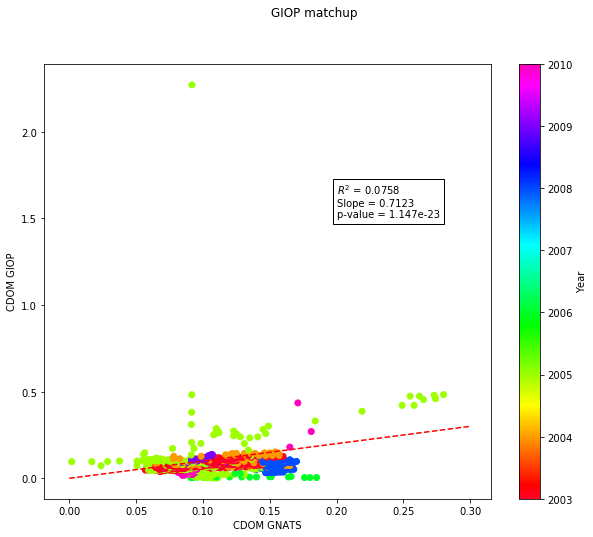

In [7]:
##giop vs gnats
x = df_m['field']
y = df_m['giop']
z = [0, 0.3]

fig, ax = plt.subplots(figsize= (10,8))
plt.suptitle('GIOP matchup')

s = ax.scatter(x,y,c=df_m['year'],cmap=plt.cm.gist_rainbow)
cb = plt.colorbar(s)
cb.set_label('Year')

ax.plot(z,z, color = 'red',linestyle = '--')
ax.set_xlabel('CDOM GNATS')
ax.set_ylabel('CDOM GIOP')
ax.text(0.20,1.5,'$R^2$ = 0.0758\nSlope = 0.7123\np-value = 1.147e-23',bbox=dict(edgecolor='black',fill=None))
fig.show()

#linear regression
import scipy
from scipy import stats
slope,intercept,r_value,p_value,std_err = scipy.stats.linregress(x,y)
r_squared = r_value**2
print('R^2=',r_squared)
print('m=',slope)
print('p=',p_value)

#save the file
filename1 = '/Users/clarabirdferrer/Documents/Bigelow/Figures/CDOM/algorithm_scatter/match_giop_gnats_scatter'
plt.savefig(filename1 + '.tif', dpi=300)

/Users/clarabirdferrer/anaconda/lib/python3.6/site-packages/matplotlib/figure.py:403: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


R^2= 0.186232955469
m= 0.735955375023
p= 4.53325845879e-59


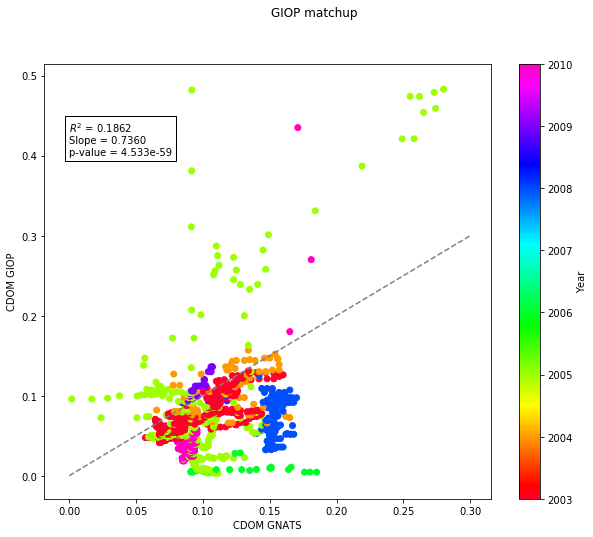

In [8]:
#giop vs gnats w/o weird giop=2 value
df = df_m.drop(519)

x = df['field']
y = df['giop']
z = [0, 0.3]

fig, ax = plt.subplots(figsize= (10,8))
plt.suptitle('GIOP matchup')

s = ax.scatter(x,y,c=df['year'],cmap=plt.cm.gist_rainbow)
cb = plt.colorbar(s)
cb.set_label('Year')
#plotting colorbar and formatting the labels
#fig.colorbar(format='%.6g',label='year',ticks=[2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015])

ax.plot(z,z, color = 'grey',linestyle = '--')
ax.set_xlabel('CDOM GNATS')
ax.set_ylabel('CDOM GIOP')
ax.text(0.0,0.4,'$R^2$ = 0.1862\nSlope = 0.7360\np-value = 4.533e-59',bbox=dict(edgecolor='black',fill=None))

fig.show()

#linear regression
import scipy
from scipy import stats
slope,intercept,r_value,p_value,std_err = scipy.stats.linregress(x,y)
r_squared = r_value**2
print('R^2=',r_squared)
print('m=',slope)
print('p=',p_value)

#save the file
filename1 = '/Users/clarabirdferrer/Documents/Bigelow/Figures/CDOM/algorithm_scatter/match_giop_outlier_gnats_colorscatter'
plt.savefig(filename1 + '.tif', dpi=300)

/Users/clarabirdferrer/anaconda/lib/python3.6/site-packages/matplotlib/figure.py:403: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


R^2= 0.186232955469
m= 0.735955375023
p= 4.53325845879e-59


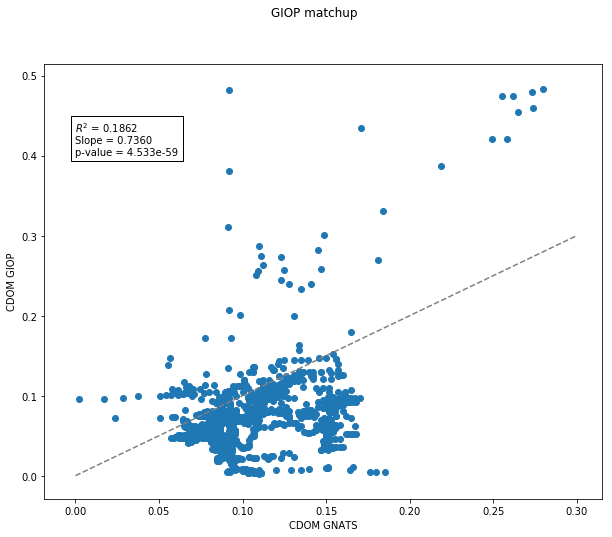

In [9]:
#giop vs gnats w/o weird giop=2 value
df = df_m.drop(519)

x = df['field']
y = df['giop']
z = [0, 0.3]

fig, ax = plt.subplots(figsize= (10,8))
plt.suptitle('GIOP matchup')

ax.scatter(x,y)

#plotting colorbar and formatting the labels
#fig.colorbar(format='%.6g',label='year',ticks=[2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015])

ax.plot(z,z, color = 'grey',linestyle = '--')
ax.set_xlabel('CDOM GNATS')
ax.set_ylabel('CDOM GIOP')
ax.text(0.0,0.4,'$R^2$ = 0.1862\nSlope = 0.7360\np-value = 4.533e-59',bbox=dict(edgecolor='black',fill=None))

fig.show()

#linear regression
import scipy
from scipy import stats
slope,intercept,r_value,p_value,std_err = scipy.stats.linregress(x,y)
r_squared = r_value**2
print('R^2=',r_squared)
print('m=',slope)
print('p=',p_value)

#save the file
filename1 = '/Users/clarabirdferrer/Documents/Bigelow/Figures/CDOM/algorithm_scatter/match_giop_outlier_gnats_scatter'
plt.savefig(filename1 + '.tif', dpi=300)

/Users/clarabirdferrer/anaconda/lib/python3.6/site-packages/matplotlib/figure.py:403: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


R^2= 0.106451073965
m= 0.492963594528
p= 4.42635824437e-33


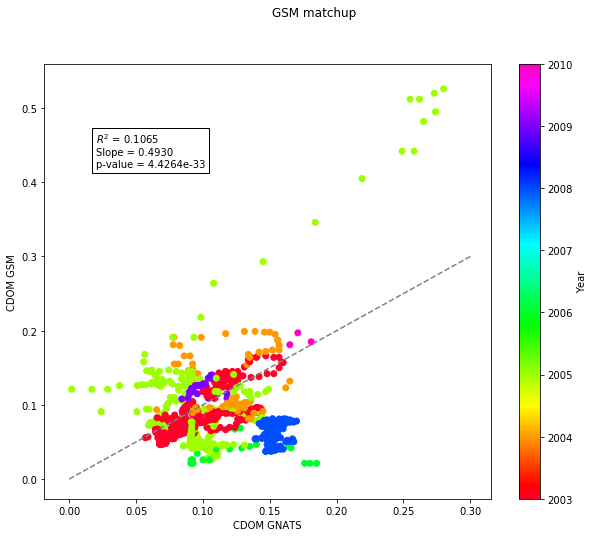

In [10]:
##gsm vs gnats
x = df_m['field']
y = df_m['gsm']
z = [0, 0.3]

fig, ax = plt.subplots(figsize= (10,8))
plt.suptitle('GSM matchup')

s = ax.scatter(x,y,c=df_m['year'],cmap=plt.cm.gist_rainbow)
cb = plt.colorbar(s)
cb.set_label('Year')

ax.plot(z,z, color = 'grey',linestyle = '--')
ax.set_xlabel('CDOM GNATS')
ax.set_ylabel('CDOM GSM')
ax.text(0.02,0.42,'$R^2$ = 0.1065\nSlope = 0.4930\np-value = 4.4264e-33',bbox=dict(edgecolor='black',fill=None))
fig.show()

#linear regression
import scipy
from scipy import stats
slope,intercept,r_value,p_value,std_err = scipy.stats.linregress(x,y)
r_squared = r_value**2
print('R^2=',r_squared)
print('m=',slope)
print('p=',p_value)

#save the file
filename1 = '/Users/clarabirdferrer/Documents/Bigelow/Figures/CDOM/algorithm_scatter/match_gsm_gnats_scatter'
plt.savefig(filename1 + '.tif', dpi=300)

/Users/clarabirdferrer/anaconda/lib/python3.6/site-packages/matplotlib/figure.py:403: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


R^2= 0.153142827408
m= 0.654534196082
p= 4.98207880835e-48


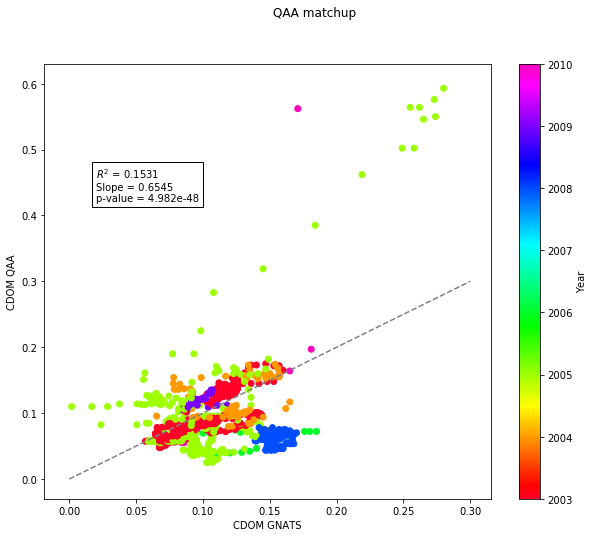

In [11]:
##qaa vs gnats
x = df_m['field']
y = df_m['qaa']
z = [0, 0.3]

fig, ax = plt.subplots(figsize= (10,8))
plt.suptitle('QAA matchup')

s = ax.scatter(x,y,c=df_m['year'],cmap=plt.cm.gist_rainbow)
cb = plt.colorbar(s)
cb.set_label('Year')

ax.plot(z,z, color = 'grey',linestyle = '--')
ax.set_xlabel('CDOM GNATS')
ax.set_ylabel('CDOM QAA')
ax.text(0.02,0.42,'$R^2$ = 0.1531\nSlope = 0.6545\np-value = 4.982e-48',bbox=dict(edgecolor='black',fill=None))
fig.show()

#linear regression
import scipy
from scipy import stats
slope,intercept,r_value,p_value,std_err = scipy.stats.linregress(x,y)
r_squared = r_value**2
print('R^2=',r_squared)
print('m=',slope)
print('p=',p_value)

#save the file
filename1 = '/Users/clarabirdferrer/Documents/Bigelow/Figures/CDOM/algorithm_scatter/match_qaa_gnats_scatter'
plt.savefig(filename1 + '.tif', dpi=300)

## scatter by year of lon vs. CDOM

In [12]:
giop2003 = []
giop2004 = []
giop2005 = []
giop2006 = []
giop2007 = []
giop2008 = []
giop2009 = []
giop2010 = []

gnats2003 = []
gnats2004 = []
gnats2005 = []
gnats2006 = []
gnats2007 = []
gnats2008 = []
gnats2009 = []
gnats2010 = []

for (y,g) in zip(dfg['year'],dfg['date']):
    if y == '2003':
        giop2003 += [g]
    if y == '2004':
        giop2004 += [g]
    if y == '2005':
        giop2005 += [g]
    if y == '2006':
        giop2006 += [g]
    if y == '2007':
        giop2007 += [g]
    if y == '2008':
        giop2008 += [g]
    if y == '2009':
        giop2009 += [g]
    if y == '2010':
        giop2010 += [g]
#s = len(giop2003) + len(giop2004) + len(giop2005) + len(giop2006) + len(giop2007)  + len(giop2008) + len(giop2009) + len(giop2010)

for (y,g) in zip(dfg['year'],dfg['date']):
    if y == '2003':
        gnats2003 += [g]
    if y == '2004':
        gnats2004 += [g]
    if y == '2005':
        gnats2005 += [g]
    if y == '2006':
        gnats2006 += [g]
    if y == '2007':
        gnats2007 += [g]
    if y == '2008':
        gnats2008 += [g]
    if y == '2009':
        gnats2009 += [g]
    if y == '2010':
        gnats2010 += [g]

/Users/clarabirdferrer/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.
/Users/clarabirdferrer/anaconda/lib/python3.6/site-packages/matplotlib/figure.py:403: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


R^2= 0.0704208991168
m= -0.0748295026522
p= 7.15615248087e-07


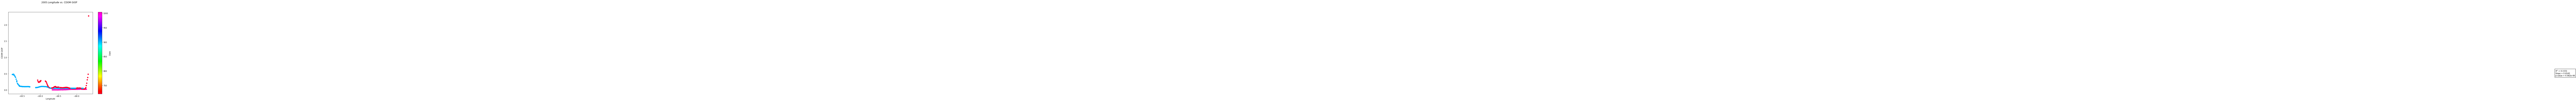

In [14]:
df = dfg.loc[dfg['date'].isin(giop2005)]
#print(df)
md = []
for i in df['date']:
    m__d = i[5:]
    m = m__d[:2]
    d = m__d[3:]
    m_d = m + d
    md += [m_d]
df['date'] = md

##lon vs giop
x = df['lon']
y = df['giop']
#z = [0, 0.3]

fig, ax = plt.subplots(figsize= (10,8))
plt.suptitle('2005:Longitude vs. CDOM GIOP')

s = ax.scatter(x,y,c=df['date'],cmap=plt.cm.gist_rainbow)
cb = plt.colorbar(s)
cb.set_label('Date')

#ax.plot(z,z, color = 'grey',linestyle = '--')
ax.set_xlabel('Longitude')
ax.set_ylabel('CDOM GIOP')
ax.text(0.02,0.42,'$R^2$ = 0.1531\nSlope = 0.6545\np-value = 4.982e-48',bbox=dict(edgecolor='black',fill=None))
fig.show()

#linear regression
import scipy
from scipy import stats
slope,intercept,r_value,p_value,std_err = scipy.stats.linregress(x,y)
r_squared = r_value**2
print('R^2=',r_squared)
print('m=',slope)
print('p=',p_value)

#save the file
filename1 = '/Users/clarabirdferrer/Documents/Bigelow/Figures/CDOM/algorithm_scatter/lon_giop_scatter'
plt.savefig(filename1 + '.tif', dpi=300)

In [15]:
#print(df)

/Users/clarabirdferrer/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.
/Users/clarabirdferrer/anaconda/lib/python3.6/site-packages/matplotlib/figure.py:403: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


R^2= 0.0348196015411
m= -0.0124970411342
p= 0.000553644970361


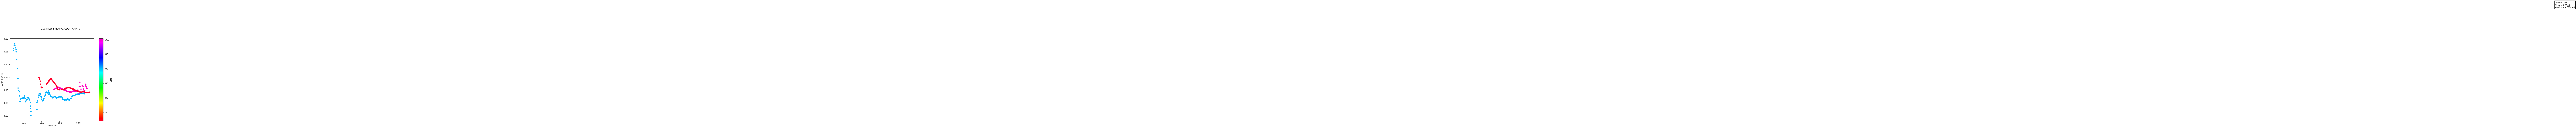

In [16]:
df = dfg.loc[dfg['date'].isin(gnats2005)]
#print(df)
md = []
for i in df['date']:
    m__d = i[5:]
    m = m__d[:2]
    d = m__d[3:]
    m_d = m + d
    md += [m_d]
df['date'] = md

##lon vs giop
x = df['lon']
y = df['gnats']
#z = [0, 0.3]

fig, ax = plt.subplots(figsize= (10,8))
plt.suptitle('2005: Longitude vs. CDOM GNATS')

s = ax.scatter(x,y,c=df['date'],cmap=plt.cm.gist_rainbow)
cb = plt.colorbar(s)
cb.set_label('Date')

#ax.plot(z,z, color = 'grey',linestyle = '--')
ax.set_xlabel('Longitude')
ax.set_ylabel('CDOM GNATS')
ax.text(0.02,0.42,'$R^2$ = 0.1531\nSlope = 0.6545\np-value = 4.982e-48',bbox=dict(edgecolor='black',fill=None))
fig.show()

#linear regression
import scipy
from scipy import stats
slope,intercept,r_value,p_value,std_err = scipy.stats.linregress(x,y)
r_squared = r_value**2
print('R^2=',r_squared)
print('m=',slope)
print('p=',p_value)

#save the file
filename1 = '/Users/clarabirdferrer/Documents/Bigelow/Figures/CDOM/algorithm_scatter/lon_gnats_scatter'
plt.savefig(filename1 + '.tif', dpi=300)

/Users/clarabirdferrer/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.
/Users/clarabirdferrer/anaconda/lib/python3.6/site-packages/matplotlib/figure.py:403: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


R^2= 0.122681310465
m= 1.4747417599
p= 3.21149807171e-11


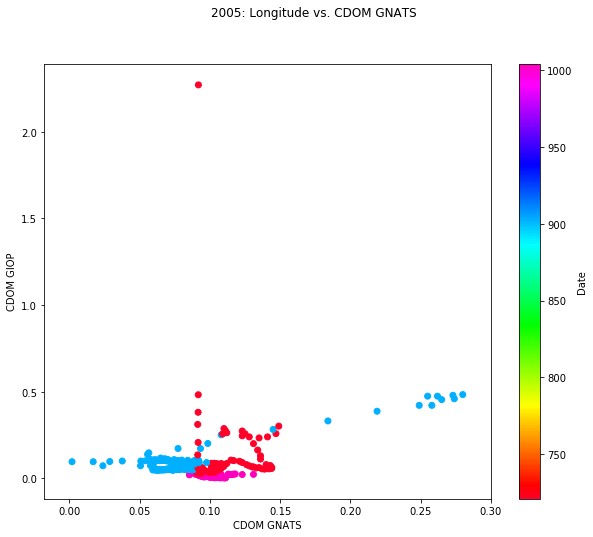

In [17]:
df = dfg.loc[dfg['date'].isin(gnats2005)]
#print(df)
md = []
for i in df['date']:
    m__d = i[5:]
    m = m__d[:2]
    d = m__d[3:]
    m_d = m + d
    md += [m_d]
df['date'] = md

##lon vs giop
x = df['gnats']
y = df['giop']
#z = [0, 0.3]

fig, ax = plt.subplots(figsize= (10,8))
plt.suptitle('2005: Longitude vs. CDOM GNATS')

s = ax.scatter(x,y,c=df['date'],cmap=plt.cm.gist_rainbow)
cb = plt.colorbar(s)
cb.set_label('Date')

#ax.plot(z,z, color = 'grey',linestyle = '--')
ax.set_xlabel('CDOM GNATS')
ax.set_ylabel('CDOM GIOP')
#ax.text(0.02,0.42,'$R^2$ = 0.1531\nSlope = 0.6545\np-value = 4.982e-48',bbox=dict(edgecolor='black',fill=None))
fig.show()

#linear regression
import scipy
from scipy import stats
slope,intercept,r_value,p_value,std_err = scipy.stats.linregress(x,y)
r_squared = r_value**2
print('R^2=',r_squared)
print('m=',slope)
print('p=',p_value)

#save the file
filename1 = '/Users/clarabirdferrer/Documents/Bigelow/Figures/CDOM/algorithm_scatter/2005_giop_gnats_scatter'
plt.savefig(filename1 + '.tif', dpi=300)